# Wine Quality Classification & Model Comparison 

Diondra Stubbs - CSC 310 Assignment 11 - 2022 November 23

## Wine Dataset

This dataset is the result of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. More about this [dataset](https://archive.ics.uci.edu/ml/datasets/wine).

In [74]:
# imports
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import svm
from sklearn import tree
from sklearn import naive_bayes
from sklearn import model_selection
sns.set_theme(palette='colorblind')

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn import model_selection as ms
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

## Classification Task

The task is to predict the quality of the wine from the measurements. I am going to attempt building an automatic wine classifier that, for measurements of a new wine returns the predicted quality.

I'm using classification because my target variable 'Quality' is a categorical target. We are trying to predict a catogory and classification is supervised learning for a categorical target.

The DataFrame has columns for quality, alcohol, malic acid, ash, alcalinity, magnesium, total_phenols, flavanoids, nonflavanoid_phenols, proanthocyanins, color intensity, hue, OD280_OD315, and proline. The target variable (chosen classifier) will be the quality of the wine.

## Objective

- Fit at least 2 models for this task, choosing proper metrics
- Decide which model is recommended
- Summarize findings using plots & tables

### Loading in the Data

In [3]:
wine_quality_url = 'https://raw.githubusercontent.com/rhodyprog4ds/11-comparison-stubbsdiondra/main/wine.csv?token=GHSAT0AAAAAAB3L5S7DQYEFWZVNHG27VAQEY335TWQ'
wine_df = pd.read_csv(wine_quality_url)
wine_df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
columns = ['Quality','Alcohol','Malic_acid','Ash','Alcalinity',
          'Magnesium','Total_phenols','Flavanoids',
          'Nonflavanoid_phenols','Proanthocyanins',
          'Color_intensity','Hue','OD280_OD315',
          'Proline']

wine_df = pd.read_csv(wine_quality_url, names = columns, 
                      sep = ',', header = None)

In [5]:
wine_df.head()

,Quality,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Modeling

### Classification w/ Naive Bayes

In the pair plot below we're look at the distribution of features. This pair plot shows the distribution of the target variable 'Quality'.

There is not a ton of overlap for the different qualities of each wine. I would like to assume that the data is reasonably seperable. The features mostly are shaped like symmetrical bell curves and their are no skewed distributions. Therefore the features are normally (Gaussian) distributed.

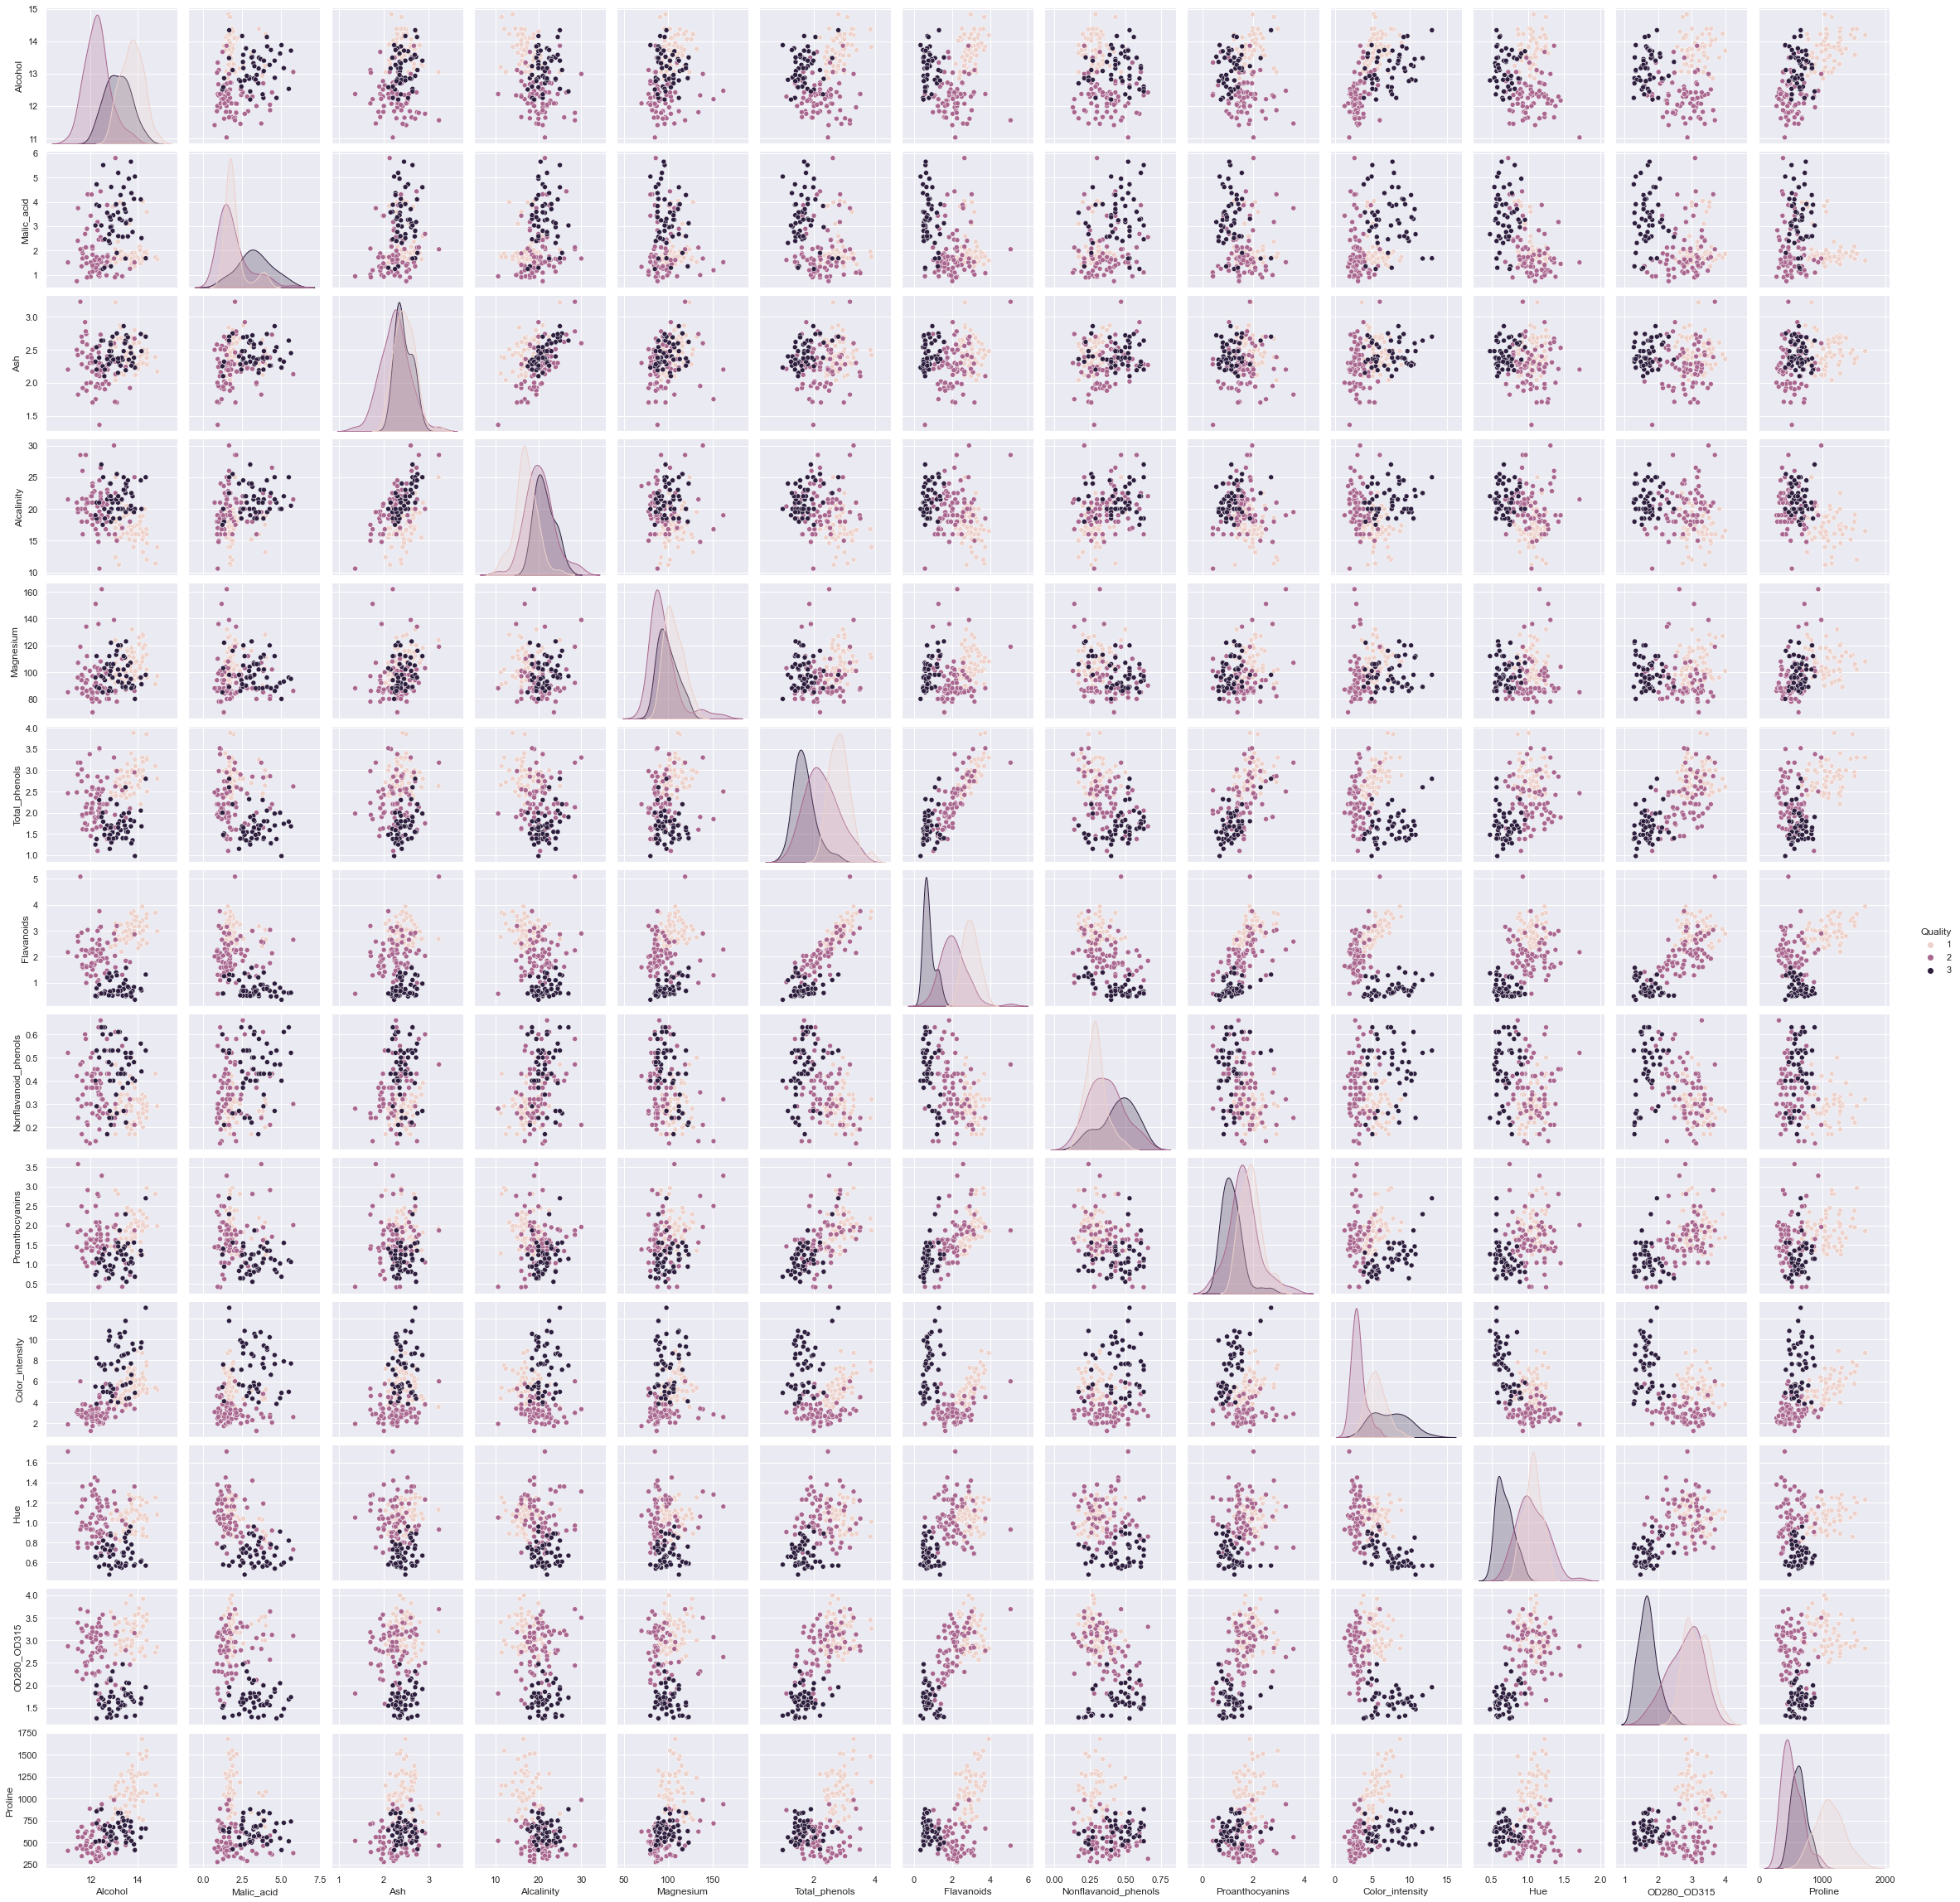

In [80]:
target_var = 'Quality'
sns.pairplot(data = wine_df, hue = target_var)

### Decision Trees

Decision trees tend to be the method of choice for predictive modeling because they are relatively easy to understand and are also very effective. The basic goal of a decision tree is to split a population of data into smaller segments. This will be one of the models I use in this model comparison.

### Logisitic Regression

Logistic regression is a statistical method used to predict the outcome of a dependent variable based on previous observations. It's a type of regression analysis and is a commonly used algorithm for solving binary classification problems. This will be one of the models I use in this model comparison.

### SVM

SVM offers very high accuracy compared to other classifiers such as logistic regression, and decision trees. It is another classification reproach that can handle multiple continuous and categorical variables. This will be one of the models I use in this model comparison.

## Splitting the Data

Here I am splitting  the data randomly into test and train portions. This split will be used to fit at least 2 different models and compare.

In [7]:
wine_X = wine_df.drop(columns='Quality')
wine_y = wine_df['Quality']

# splitting dataframe into training and test/validation set 
wine_X_train, wine_X_test, wine_y_train, wine_y_test = model_selection.train_test_split(wine_X,wine_y,test_size=0.2)

## Classifier Visualization

I saw a really cool way to make a visual comparison between models to kind of predict which will perform the best.

[Classifier Comparison](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)

### Log Loss

Log Loss is an important classification metric based on probabilities. It’s a good metric for comparing models. A lower log loss value means better predictions.

Log Loss is the negative average of the log of corrected predicted probabilities for each instance. It is indicative of how close the prediction probability is to the corresponding actual/true value (0 or 1 in case of binary classification).

In [10]:
# classifier models
classifiers = [LogisticRegression(solver='newton-cg', max_iter=1000),
    SVC(kernel="linear", C=0.5, probability=True),
    DecisionTreeClassifier(),
    GaussianNB()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(wine_X_train, wine_y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(wine_X_test)
    acc = accuracy_score(wine_y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(wine_X_test)
    ll = log_loss(wine_y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

LogisticRegression
****Results****
Accuracy: 97.2222%
Log Loss: 0.07835889012415238
SVC
****Results****
Accuracy: 97.2222%
Log Loss: 0.17108120028193768
DecisionTreeClassifier
****Results****
Accuracy: 91.6667%
Log Loss: 2.8782313662425585
GaussianNB
****Results****
Accuracy: 97.2222%
Log Loss: 0.2296132470101847


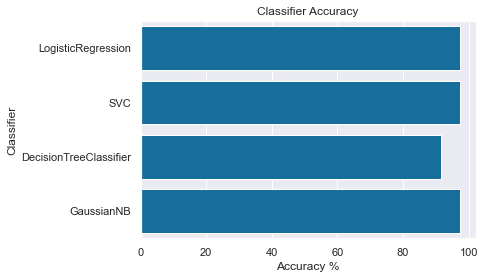

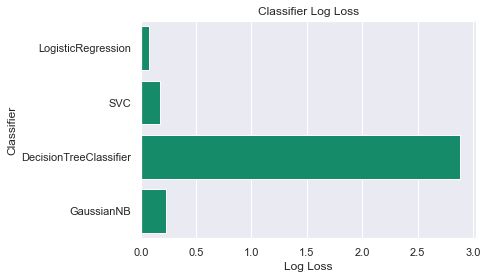

In [11]:
# Acurracy plot
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

# Log loss plot
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")
plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

The SVC, Gaussian Naive Bayes and Logistic Regression models are giving us the best accuracy on this data. They all have and accuracy of 97.22% while the Decision Tree model gives us an accuracy of 91.67%. 

I'm going to compare all 4 models for this model comparison task.

## Decision Tree Model

In [14]:
dt = tree.DecisionTreeClassifier()

In [15]:
# Getting the parameters
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [16]:
params_dt = {'criterion':['gini','entropy'],'max_depth':[2,3,4],
       'min_samples_leaf':list(range(2,20,2))}

In [17]:
dt_opt = model_selection.GridSearchCV(dt, params_dt)
dt_opt.fit(wine_X_train,wine_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]})

In [18]:
dt_cv_df = pd.DataFrame(dt_opt.cv_results_)
dt_cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004001,0.000895,0.002603,0.000800,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.862069,0.827586,0.750000,0.857143,0.857143,0.830788,0.042201,34
1,0.003200,0.000399,0.002201,0.000401,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.862069,0.862069,0.750000,0.857143,0.821429,0.830542,0.043048,39
2,0.003201,0.000749,0.002602,0.000799,gini,2,6,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.862069,0.827586,0.678571,0.857143,0.821429,0.809360,0.067298,54
3,0.003201,0.001171,0.002202,0.000400,gini,2,8,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.862069,0.827586,0.678571,0.857143,0.857143,0.816502,0.070039,40
4,0.002396,0.000490,0.002004,0.000003,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.862069,0.827586,0.678571,0.857143,0.857143,0.816502,0.070039,40


In [19]:
dt_opt.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2}

In [34]:
dt_opt.score(wine_X_test,wine_y_test)

0.9166666666666666

The accuracy score is 91.67%.

## SVM Model

In [51]:
svm_clf = svm.SVC(probability=True)
param_grid_svm = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}
svm_opt = model_selection.GridSearchCV(svm_clf,param_grid_svm)

In [52]:
svm_opt.fit(wine_X_train,wine_y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.5, 1, 10], 'kernel': ['linear', 'rbf']})

In [53]:
svm_opt.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [54]:
svm_opt.score(wine_X_test,wine_y_test), dt_opt.score(wine_X_test,wine_y_test)

(0.9722222222222222, 0.9166666666666666)

The accuracy of the SVM model is 97.22%. This performs better than the decison tree model.

### EDA

In [43]:
svm_opt.fit(wine_X_train,wine_y_train)
sv_df = pd.DataFrame(svm_opt.cv_results_)
sv_df['mean_test_score'].describe()

count    6.000000
mean     0.819581
std      0.155007
min      0.668966
25%      0.676170
50%      0.827709
75%      0.958374
max      0.965517
Name: mean_test_score, dtype: float64

In [45]:
dt_cv_df['mean_test_score'].describe()

count    54.000000
mean      0.865795
std       0.030092
min       0.803202
25%       0.847291
50%       0.859236
75%       0.894520
max       0.915517
Name: mean_test_score, dtype: float64

In both cases the standard deviation is low meaning that the parameter changes didn’t impact the performance much.

These low standard deviations mean that the data is more clustered around the mean (or expected value of the set), these models are both reliable.

### Significant Differences??

Here I am using confidence intervals to determine if their are any significant difference between the models. To determine whether the difference between two means is statistically significant, we compare the confidence intervals for the models. If the intervals overlap, the difference between groups is not statistically significant. If there is no overlap, the difference is significant.

In [55]:
def classification_confint(acc, n):
    
    interval = 1.96*np.sqrt(acc*(1-acc)/n)
    lb = max(0, acc - interval)
    ub = min(1.0, acc + interval)
    
    return (lb,ub)

In [56]:
classification_confint(dt_opt.best_score_, len(wine_X_train))

(0.9056506112799839, 0.9815415069466172)

In [57]:
classification_confint(dt_opt.best_score_, len(wine_X_train)*10)

(0.9315966549144624, 0.9555954633121387)

The intervals of the the two models overlap so the difference between groups is not statistically significant. 

The performance of two models are NOT meaningfully different.

## Gaussian Naive Bayes Model

In [22]:
gnb = GaussianNB()
gnb.fit(wine_X_train,wine_y_train)

GaussianNB()

In [24]:
y_pred = gnb.predict(wine_X_test)

In [25]:
con_matrix = confusion_matrix(wine_y_test,y_pred) 
con_matrix

array([[11,  1,  0],
       [ 0, 15,  0],
       [ 0,  0,  9]], dtype=int64)

In [27]:
score = accuracy_score(wine_y_test,y_pred)

Text(0.5, 1.0, 'Accuracy Score: 0.9722222222222222')

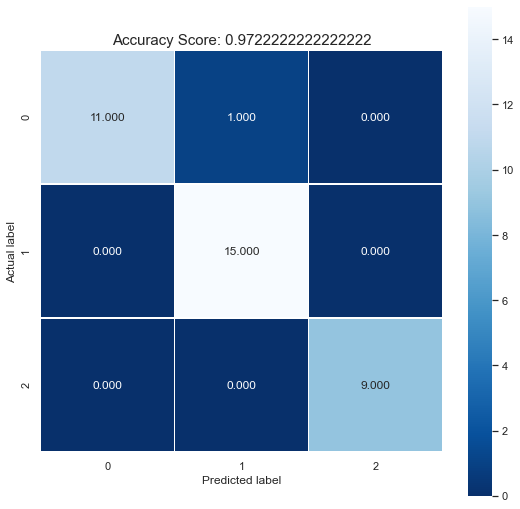

In [28]:
plt.figure(figsize=(9,9))
sns.heatmap(con_matrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

In [31]:
wine_df.shape, wine_X_test.shape

((178, 14), (36, 13))

The dimension of this matrix is 3*3 because this model is binary classification and there are 3 classes for wine quality. The classes of the Quality variable are 0,1 and 2.

Diagonal values show the accurate predictions, while non-diagonals show inaccurate predictions. In the output, 11, 15 and 9 are actual predictions, and there is 1 incorrect predictions. There are 36 samples in the test set, 35 of them are predicted correctly. That means 35/36 samples were correctly classified. In other words, 97.22% of the samples were correctly classified while 2.77% weren't.

This Gaussian Naive Bayes Classifier model works well meaning that the parameters fit the data well with 97.2% accuracy as shown below.

The Grid Search Optimization below verifies this.

In [23]:
gnb.score(wine_X_test,wine_y_test)

0.9722222222222222

### GNB Grid Search Optimization

In [84]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [81]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = model_selection.GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(wine_X_train,wine_y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=3.5111917342151277e-08)


In [121]:
y_pred1 = nbModel_grid.predict(wine_X_test)

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(wine_y_test, y_pred1), ": is the confusion matrix")
from sklearn.metrics import accuracy_score
print(accuracy_score(wine_y_test, y_pred1), ": is the accuracy score")

[[11  1  0]
 [ 0 15  0]
 [ 0  0  9]] : is the confusion matrix
0.9722222222222222 : is the accuracy score


## SVM and GNB Learning Curves

Learning curve in ML is used to assess how models will perform with varying numbers of training samples.  This is achieved by monitoring the training and validation scores (model accuracy) with an increasing number of training samples.

### SVM Learning Curve

In [58]:
svm_clf1 = svm.SVC(gamma=0.001)
gnb_clf = naive_bayes.GaussianNB()

In [59]:
cv = model_selection.ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

In [61]:
train_sizes = np.linspace(.05,1,10)

train_sizes_svm, train_scores_svm, test_scores_svm, fit_times_svm, score_times_svm = model_selection.learning_curve(
    svm_clf1,
    wine_X,
    wine_y,
    cv=cv,
    train_sizes=train_sizes,
    return_times=True,)

In [62]:
svm_learning_df = pd.DataFrame(data = train_sizes_svm, columns = ['train_size'])
# svm_learning_df['train_size'] = train_sizes_svm
svm_learning_df['train_score'] = np.mean(train_scores_svm,axis=1)
svm_learning_df['test_score'] = np.mean(test_scores_svm,axis=1)
svm_learning_df['fit_time'] = np.mean(fit_times_svm,axis=1)
svm_learning_df['score_times'] = np.mean(score_times_svm,axis=1)

svm_learning_df.head()

,train_size,train_score,test_score,fit_time,score_times
0,7,0.965714,0.426111,0.002851,0.001942
1,22,0.929091,0.567778,0.002891,0.002059
2,37,0.902703,0.633056,0.003008,0.002201
3,52,0.887115,0.660556,0.003155,0.002210
4,67,0.876567,0.676667,0.003383,0.002409


In [70]:
svm_learning_df_scores = svm_learning_df.melt(id_vars=['train_size'],
                                                value_vars=['train_score','test_score'])
svm_learning_df_scores.head(2)

,train_size,variable,value
0,7,train_score,0.965714
1,22,train_score,0.929091


[Text(0.5, 1.0, 'SVM Learning Curve')]

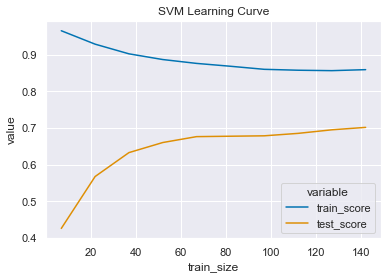

In [125]:
sns.lineplot(data=svm_learning_df_scores,x='train_size',y='value',hue='variable').set(title='SVM Learning Curve')

This plot has a large gap between the training and test accuracy. The training accuracy is larger than the test accuracy. This means that the model suffers from oberfitting. As the training size increases, the training accuracy decreases and test accuracy increases. However, the training accuracy is much greater than validation accuracy and also desired accuracy. 

It would benefit or improve the model if we increased the training size.

### GNB Learning Curve

In [66]:
train_sizes_gnb, train_scores_gnb, test_scores_gnb, fit_times_gnb, score_times_gnb = model_selection.learning_curve(
  gnb_clf,
  wine_X,
  wine_y,
  cv=cv,
  train_sizes=train_sizes,
  return_times=True)

In [67]:
gnb_learning_df = pd.DataFrame(data = train_sizes_gnb, columns = ['train_size'])
# gnb_learning_df['train_size'] = train_sizes_gnb
gnb_learning_df['train_score'] = np.mean(train_scores_gnb,axis=1)
gnb_learning_df['test_score'] = np.mean(test_scores_gnb,axis=1)
gnb_learning_df['fit_time'] = np.mean(fit_times_gnb,axis=1)
gnb_learning_df['score_times_gnb'] = np.mean(score_times_gnb,axis=1)

[Text(0.5, 1.0, 'GNB Learning Curve')]

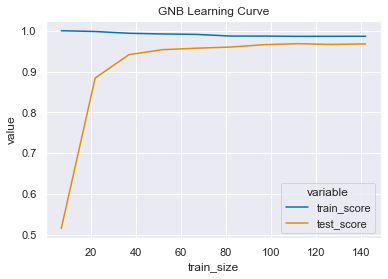

In [126]:
gnb_learning_scores = gnb_learning_df.melt(id_vars=['train_size'],value_vars=['train_score','test_score'])
sns.lineplot(data = gnb_learning_scores, x ='train_size', y='value',hue='variable').set(title='GNB Learning Curve')

To build a good model, there needs to be a good balance between bias and variance such that it minimizes the total error.

This model has a good bias variance tradeoff. So there isn't much overfitting or underfitting in the GNB model. Even thouhg both the SVM and GNB models have the same accuracy score, the learning curves tell us that the GNB model is better.

In [106]:
logisticRegr = LogisticRegression(solver='newton-cg', max_iter=1000)

# fitting the model with wine data
logisticRegr.fit(wine_X_train,wine_y_train)
y_pred = logisticRegr.predict(wine_X_test)

In [107]:
logisticRegr.score(wine_X_test,wine_y_test)

0.9722222222222222

In [108]:
cm = confusion_matrix(wine_y_test,y_pred)
print(cm)

[[11  1  0]
 [ 0 15  0]
 [ 0  0  9]]


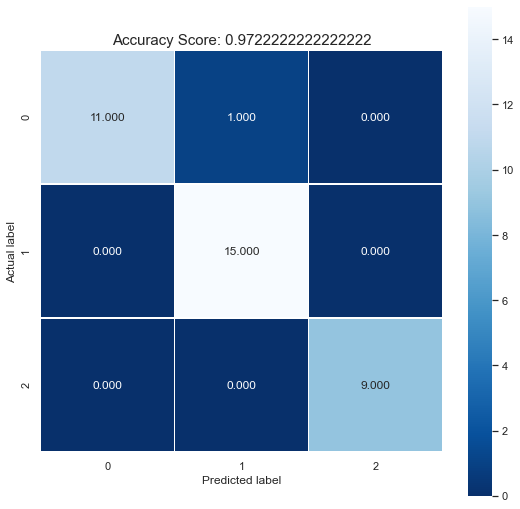

In [109]:
score=logisticRegr.score(wine_X_test,wine_y_test)

# Confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

The accuracy of the Logistic Regression model is 97.22%.

## Recommended Model

From the accuracy plot we say that the Decision Tree, Gaussian Naive Byes and Logistic Regression classifiers perform better than the SVM classifier.

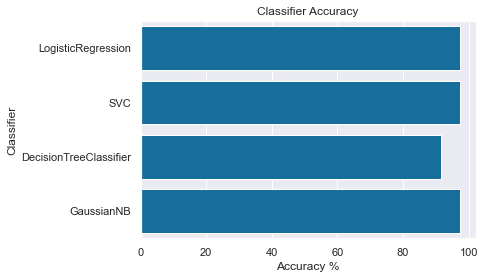

In [120]:
# Acurracy plot
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")
plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

The accuracy scores portray the same information.

In [122]:
data = [dt_opt.score(wine_X_test,wine_y_test),
svm_opt.score(wine_X_test,wine_y_test),
accuracy_score(wine_y_test, y_pred1),
logisticRegr.score(wine_X_test,wine_y_test)]

In [123]:
df = pd.DataFrame(data, columns = ['Accuracy Scores'])
df

,Accuracy Scores
0,0.916667
1,0.972222
2,0.972222
3,0.972222


By this information, we can conclude that the Decision Tree classifier model isn't as good as the others. Therefore we should choose between the Logistic, Gaussian Naive Bayes and SVM model.

[Text(0.5, 1.0, 'SVM Learning Curve')]

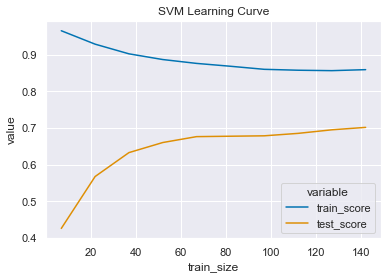

In [124]:
sns.lineplot(data=svm_learning_df_scores,x='train_size',y='value',hue='variable').set(title='SVM Learning Curve')


[Text(0.5, 1.0, 'GNB Learning Curve')]

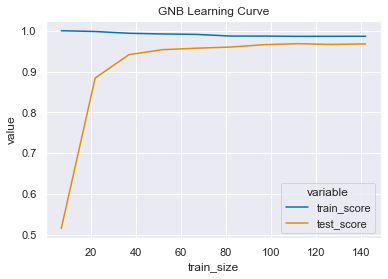

In [127]:
sns.lineplot(data = gnb_learning_scores, x ='train_size', y='value',hue='variable').set(title='GNB Learning Curve')

Looking at the learning curves for the Gaussian Naive Bayes (GNB) and SVM classifier models, we're able to decide which model is better for this data. 

The SVM learning curve has a large gap between the training and test accuracy. We determined earlier that the SVM model suffers from overfitting. The SVM model can be improved by increasing the training size.

We also defined a good model to be one that has a good balance between bias and variance such that it minimizes the total error. The GNB learning curve has a good bias variance tradeoff. So there isn't much overfitting or underfitting in the GNB model. Therefore the GNB model is better.

The Gaussian Naive Bayes and Logistic Regression models share the same accuracy score (97.22%) and confusion  matrix.  Both are linear classifiers, however depending one the size of the data, we're able to determine which is better.

When the training size reaches infinity the logistic regression performs better than the Gaussian Naive Bayes. However the GNB reaches its asymptotic faster than Logistic Regression. GNB reaches the asymptotic solution for fewer training sets than Logistic Regression.

Naive bayes give a faster solution for few training sets while considering independent features. Therefore, I recommend the GNB model.